<a href="https://colab.research.google.com/github/1rd0/18lab_bek/blob/master/Autism_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv('train.csv')

In [ ]:
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         1         1  ...       f  White-European       no     no   
1         0         0  ...       f     South Asian       no     no   
2         0         1  ...       f  White-European       no     no   
3         0         0  ...       f     South Asian       no     no   
4         0         1  ...       m           Black       no    yes   

    contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0   United States       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


Очистка данных


In [ ]:
df['Class/ASD'].value_counts()


Class/ASD
0    615
1    185
Name: count, dtype: int64

In [ ]:
df['age_desc'].value_counts()

age_desc
18 and more    800
Name: count, dtype: int64

можно заметить некоторую двусмысленность: присутствуют «?», «другие» и «Другие», которые должны быть одинаковыми, поскольку они неизвестны

In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


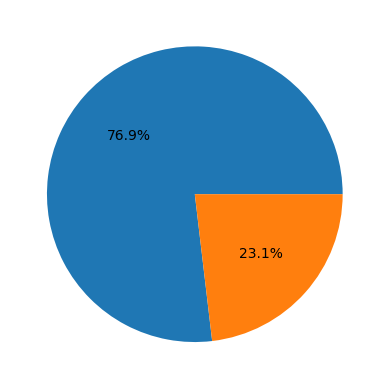

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


Разделенные по типу содержащихся

IndexError: index 12 is out of bounds for axis 0 with size 12

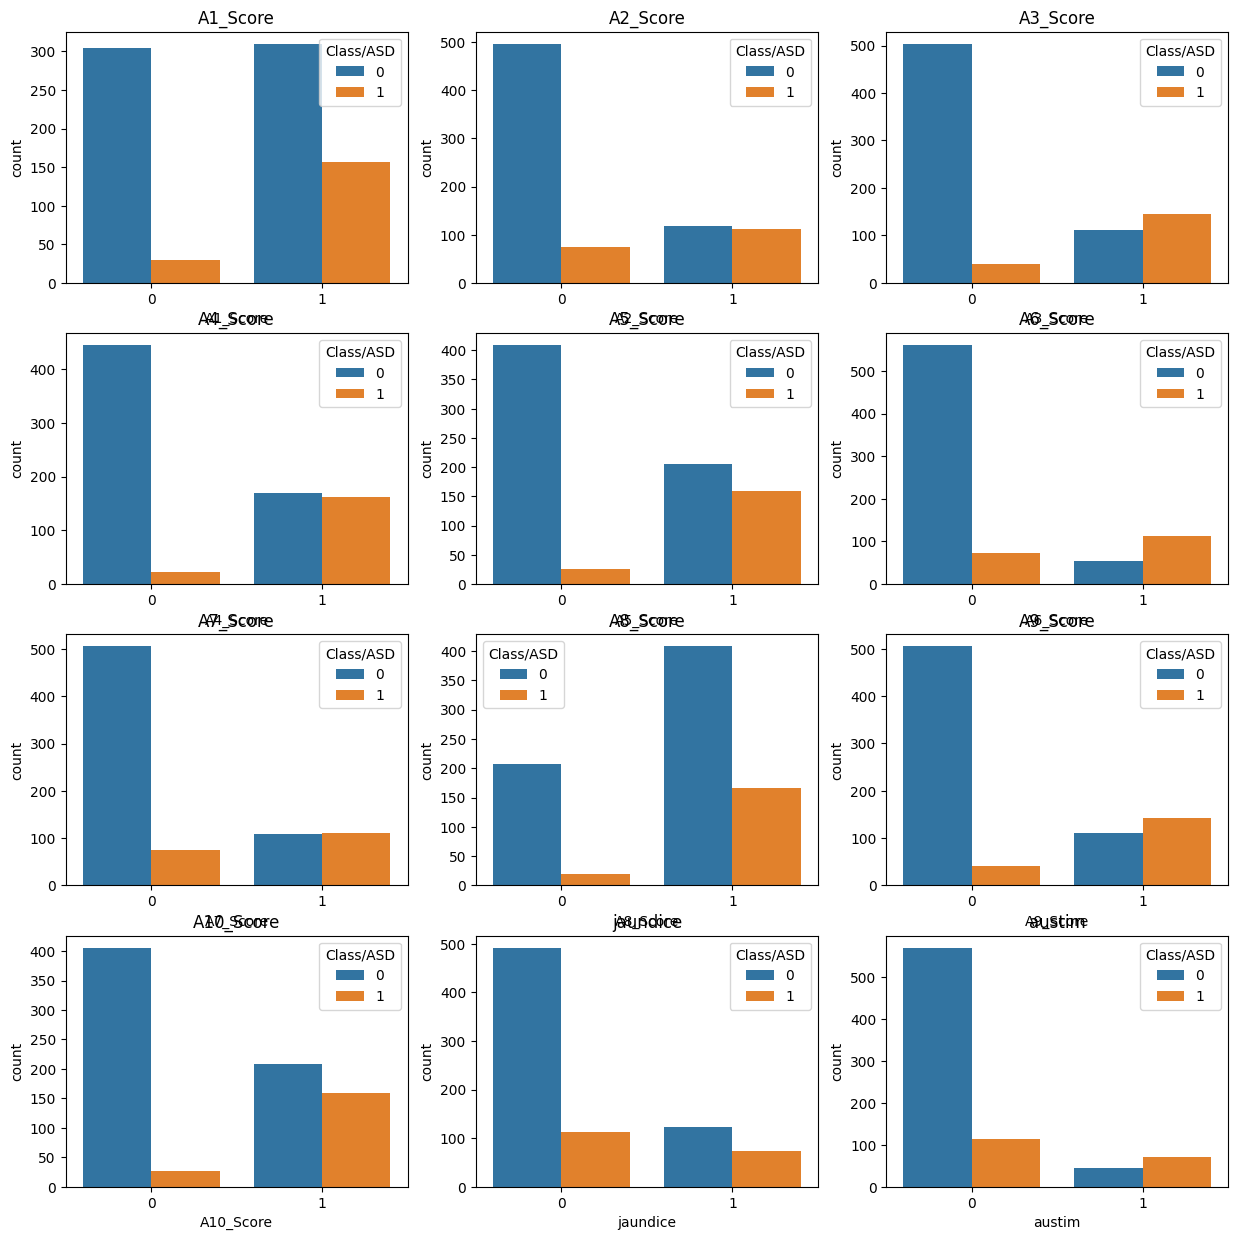

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create subplots with a specified figure size
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(ints):
    sb.countplot(x=df[col], hue=df['Class/ASD'], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


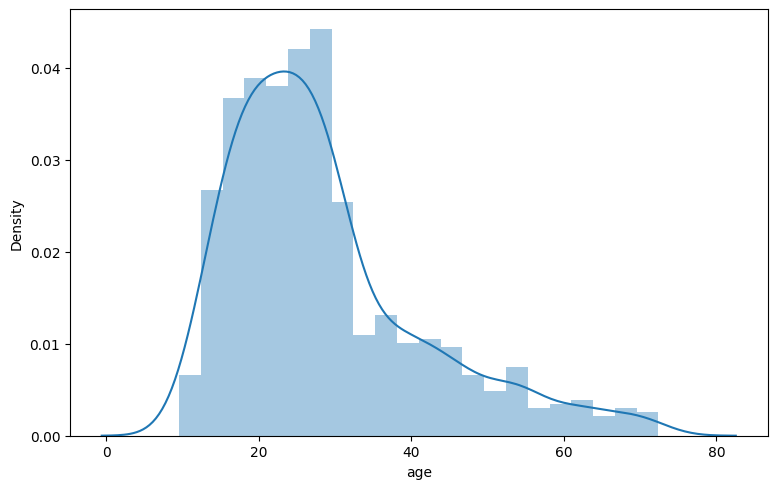

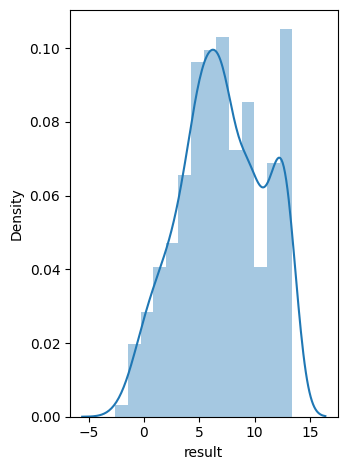

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
  plt.tight_layout()
  plt.show()


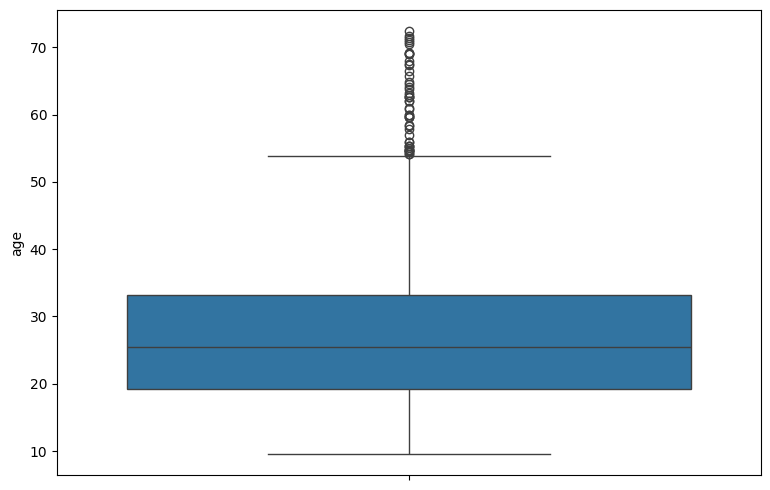

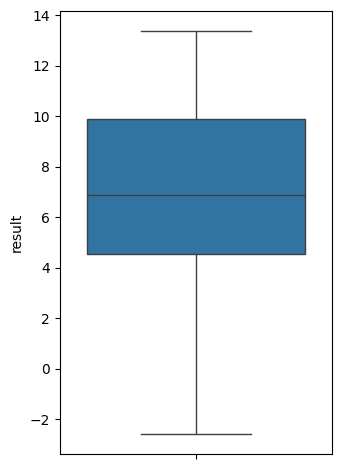

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
  plt.tight_layout()
  plt.show()


In [ ]:
df = df[df['result']>-5]
df.shape


(800, 22)

In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim','gender']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
dict_ethnicity = dict(zip(df['ethnicity'].value_counts().index, range(1,df['ethnicity'].nunique()+1)))
dict_ethnicity

{'White-European': 1,
 'Others': 2,
 'Asian': 3,
 'Middle Eastern ': 4,
 'Black': 5,
 'Latino': 6,
 'South Asian': 7,
 'Pasifika': 8,
 'Hispanic': 9,
 'Turkish': 10}

In [ ]:
print(dict_relation)

{'Self': 1, 'Others': 2, 'Parent': 3, 'Relative': 4, 'Health care professional': 5}


In [ ]:
df['ethnicity'] = df['ethnicity'].map(dict_ethnicity)


In [ ]:
col_name = 'contry_of_res'
dict_country = dict(zip(df[col_name].value_counts().index, range(1,df[col_name].nunique()+1)))


In [ ]:
print(dict_country)

{'United States': 1, 'United Arab Emirates': 2, 'New Zealand': 3, 'India': 4, 'United Kingdom': 5, 'Australia': 6, 'Jordan': 7, 'Afghanistan': 8, 'Sri Lanka': 9, 'Canada': 10, 'Netherlands': 11, 'Austria': 12, 'France': 13, 'Italy': 14, 'Russia': 15, 'Brazil': 16, 'Kazakhstan': 17, 'Mexico': 18, 'Philippines': 19, 'Viet Nam': 20, 'Armenia': 21, 'Iran': 22, 'Malaysia': 23, 'Spain': 24, 'South Africa': 25, 'Egypt': 26, 'Costa Rica': 27, 'Saudi Arabia': 28, 'Nicaragua': 29, 'Czech Republic': 30, 'Romania': 31, 'Ukraine': 32, 'Ethiopia': 33, 'Germany': 34, 'Aruba': 35, 'Ireland': 36, 'Bahamas': 37, 'Bolivia': 38, 'Belgium': 39, 'AmericanSamoa': 40, 'China': 41, 'Argentina': 42, 'Azerbaijan': 43, 'Japan': 44, 'Pakistan': 45, 'Iceland': 46, 'Angola': 47, 'Serbia': 48, 'Uruguay': 49, 'Ecuador': 50, 'Sweden': 51, 'Oman': 52, 'Bangladesh': 53, 'Cyprus': 54, 'Sierra Leone': 55, 'Hong Kong': 56, 'Indonesia': 57, 'Tonga': 58, 'Iraq': 59, 'Finland': 60, 'Niger': 61}


In [ ]:
df[col_name] = df[col_name].map(dict_country)

In [ ]:
col_name = 'relation'
dict_relation = dict(zip(df[col_name].value_counts().index, range(1,df[col_name].nunique()+1)))
df[col_name] = df[col_name].map(dict_relation)

In [ ]:
df.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,1,0,0,1,0,7.819715,18 and more,1,0
1,2,0,0,0,0,0,0,0,0,0,...,f,7,0,0,6,0,10.544296,18 and more,2,0
2,3,1,1,1,1,1,1,0,0,1,...,f,1,0,0,5,0,13.167506,18 and more,1,1
3,4,0,0,0,1,0,0,0,0,0,...,f,7,0,0,3,0,1.530098,18 and more,2,0
4,5,0,0,0,0,1,0,0,0,1,...,m,5,0,1,14,0,7.949723,18 and more,1,0


In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim','gender']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
features.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,contry_of_res,result,relation
0,1,0,1,1,1,1,0,1,1,1,18.605397,1,0,1,7.819715,1
1,0,0,0,0,0,0,0,0,0,1,13.829369,7,0,6,10.544296,2
2,1,1,1,1,1,1,0,0,1,1,14.679893,1,0,5,13.167506,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,7,0,3,1.530098,2
4,0,0,0,0,1,0,0,0,1,1,14.256686,5,0,14,7.949723,1


In [ ]:
features.isnull().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
contry_of_res    0
result           0
relation         0
dtype: int64

In [ ]:
df['contry_of_res'].fillna(1.0,inplace=True)


Model building


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.



In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]

In [ ]:
import tensorflow as tf

In [ ]:


nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim= input_features))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_1.fit(X_train_scaled, Y_train, epochs=150)

model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7791 (30.43 KB)
Trainable params: 7791 (30.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
20/20 [==============================] - 1s 2ms/step - loss: 0.7332 - accuracy: 0.3313
Epoch 2/150
20/20 [==============================] - 0s

In [ ]:
y_predict = nn_1.predict(X_test_scaled)

import numpy as np
Y_predict = np.round(y_predict)

from sklearn.metrics import classification_report
# Create and save the training classification report
training_report = classification_report(Y_test, Y_predict)

# Print the training classification report
print(training_report)

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       119
           1       0.78      0.61      0.68        41

    accuracy                           0.86       160
   macro avg       0.83      0.78      0.80       160
weighted avg       0.85      0.86      0.85       160



In [ ]:
nn_1.save("Neural_Network_Optimized_Resampled.h5")

In [ ]:
import joblib

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
def calculate_aq10(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score):
    score = 0
    score += A1_Score
    score += (1 - A2_Score)
    score += (1 - A3_Score)
    score += (1 - A4_Score)
    score += (1 - A5_Score)
    score += (1 - A6_Score)
    score += A7_Score
    score += A8_Score
    score += (1 - A9_Score)
    score += A10_Score
    return score

In [ ]:
def predict_asd(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score,
                age, ethnicity, jaundice, contry_of_res, relation):
    # Calculate AQ-10 score
    aq10_result = calculate_aq10(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score)
    jaundice = 1 if jaundice == 'yes' else 0

    # Create a DataFrame from inputs
    input_data = pd.DataFrame({
        'A1_Score': [A1_Score],
        'A2_Score': [A2_Score],
        'A3_Score': [A3_Score],
        'A4_Score': [A4_Score],
        'A5_Score': [A5_Score],
        'A6_Score': [A6_Score],
        'A7_Score': [A7_Score],
        'A8_Score': [A8_Score],
        'A9_Score': [A9_Score],
        'A10_Score': [A10_Score],
        'age': [age],
        'ethnicity': [ethnicity],
        'jaundice': [jaundice],
        'contry_of_res': [contry_of_res],
        'result': [aq10_result],
        'relation': [relation]
    })

    # Load the scaler and model
    scaler = joblib.load('scaler.pkl')
    model = tf.keras.models.load_model('Neural_Network_Optimized_Resampled.h5')

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_scaled)
    return "ASD" if prediction[0] > 0.5 else "No ASD"

In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s

1/1 [==============================] - 0s 66ms/step


No ASD


In [ ]:
import gradio as gr
def gradio_interface(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score,
                     age, ethnicity, jaundice, contry_of_res, relation):
    return predict_asd(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score,
                       age, ethnicity, jaundice, contry_of_res, relation)
iface = gr.Interface(
    fn=gradio_interface,
    inputs=[
        gr.Slider(0, 1, label="I often notice small sounds when others do not"),
        gr.Slider(0, 1, label="I usually concentrate more on the whole picture, rather than the small details"),
        gr.Slider(0, 1, label="I find it easy to do more than one thing at once"),
        gr.Slider(0, 1, label="If there is an interruption, I can switch back to what I was doing very quickly"),
        gr.Slider(0, 1, label="I find it easy to ‘read between the lines’ when someone is talking to me"),
        gr.Slider(0, 1, label="I know how to tell if someone listening to me is getting bored"),
        gr.Slider(0, 1, label="When I’m reading a story I find it difficult to work out the characters’ intentions"),
        gr.Slider(0, 1, label="I like to collect information about categories of things (e.g. types of car, types of bird, types of train, types of plant etc)"),
        gr.Slider(0, 1, label="I find it easy to work out what someone is thinking or feeling just by looking at their face"),
        gr.Slider(0, 1, label="I find it difficult to work out people’s intentions"),
        gr.Slider(0, 100, step=1, label="Age"),
        gr.Number(label="Ethnicity (numeric)"),
        gr.Radio(choices=["yes", "no"], label="Jaundice"),
        gr.Number(label="Country of Residence (numeric)"),
        gr.Number(label="Relation (numeric)")
    ],
    outputs="text",
    title="AQ-10 Test and ASD Prediction",
    description="Fill out the AQ-10 test and additional information to predict ASD."
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3b70dd2759a12873d1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
